# Informações

- nomes: Raphael Leite da Costa Nascimento e Adriel Dos Sandos Araujo Cabral
- matrículas: 20190038319 e 20190034839
- Disciplina: Visualização de Dados

# Importações

In [22]:
import os
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Montando o data frame princial

In [23]:
data_path = 'dados'
files = [os.path.join(data_path, file) for file in os.listdir(data_path)]
files

['dados/datatran2007.csv',
 'dados/datatran2015.csv',
 'dados/datatran2019.csv',
 'dados/datatran2008.csv',
 'dados/datatran2018.csv',
 'dados/datatran2011.csv',
 'dados/datatran2016.csv',
 'dados/datatran2009.csv',
 'dados/datatran2021.csv',
 'dados/datatran2012.csv',
 'dados/datatran2022.csv',
 'dados/datatran2013.csv',
 'dados/datatran2017.csv',
 'dados/datatran2014.csv',
 'dados/datatran2020.csv',
 'dados/datatran2010.csv']

Criando uma lista de data frames e depois unindo todos em um so

In [24]:
dataframes = []

for file in files:
    try:
        dataframes.append(pd.read_csv(file, delimiter=';'))
    except:
        dataframes.append(pd.read_csv(file, delimiter=';', encoding='latin-1'))

df_final = pd.concat(dataframes, ignore_index=True)
df_sem_duplicatas = df_final.drop_duplicates(subset='id')
df_sem_duplicatas['count'] = 1

/home/raphael720/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (5,6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/tmp/ipykernel_8364/698160551.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sem_duplicatas['count'] = 1


# Tratando os valores nulos 

Substituindo os valores nulos da coluna 'ano' pelo ano da coluna 'data_inversa'

In [25]:
def get_ano(year):
    
    regex1 = r'([0-9]+)(-[0-9]+)(-[0-9]+)'
    regex2 = r'([0-9])+/([0-9])+/([0-9]+)'
    
    if '-' in year:
        return str(re.search(regex1, year).group(1))
    else:
        return str('20' + re.search(regex2, year).group(3))

In [26]:
df_sem_duplicatas.loc[df_sem_duplicatas['ano'].isnull(), 'ano'] = df_sem_duplicatas.loc[df_sem_duplicatas['ano'].isnull(), 'data_inversa'].apply(get_ano)
df_sem_duplicatas = df_sem_duplicatas.astype({'ano': str})
df_sem_duplicatas['ano'] = df_sem_duplicatas['ano'].apply(lambda ano: ano.split('.')[0], 1)

/home/raphael720/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [27]:
df_sem_duplicatas['ano'].unique()

array(['2007', '2015', '2019', '2008', '2018', '2011', '2016', '2009',
       '2021', '2012', '2022', '2013', '2017', '2014', '2020', '2010'],
      dtype=object)

In [28]:
df_sem_duplicatas[['ano']].isnull().sum()

ano    0
dtype: int64

In [29]:
df_sem_duplicatas.columns

Index(['id', 'data_inversa', 'dia_semana', 'horario', 'uf', 'br', 'km',
       'municipio', 'causa_acidente', 'tipo_acidente',
       'classificacao_acidente', 'fase_dia', 'sentido_via',
       'condicao_metereologica', 'tipo_pista', 'tracado_via', 'uso_solo',
       'ano', 'pessoas', 'mortos', 'feridos_leves', 'feridos_graves', 'ilesos',
       'ignorados', 'feridos', 'veiculos', 'latitude', 'longitude', 'regional',
       'delegacia', 'uop', 'count'],
      dtype='object')

In [30]:
df_sem_duplicatas

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,...,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop,count
0,10.0,11/06/2007,Segunda,15:30:00,MG,381,623.2,OLIVEIRA,Falta de atenção,Colisão frontal,...,5,0,4,6,NaN,NaN,NaN,NaN,NaN,1
2,1032898.0,13/08/2007,Segunda,14:25:00,MG,40,585.5,ITABIRITO,Outras,Saída de Pista,...,2,0,1,1,NaN,NaN,NaN,NaN,NaN,1
3,1051130.0,12/02/2007,Segunda,02:10:00,MA,135,11.0,SAO LUIS,Animais na Pista,Atropelamento de animal,...,0,0,3,1,NaN,NaN,NaN,NaN,NaN,1
4,1066824.0,20/11/2007,Terça,05:30:00,CE,222,30.8,CAUCAIA,Defeito mecânico em veículo,Capotamento,...,0,0,1,1,NaN,NaN,NaN,NaN,NaN,1
5,1069918.0,16/12/2007,Domingo,17:40:00,MA,230,14.0,BARAO DE GRAJAU,Outras,Capotamento,...,0,0,1,1,NaN,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1981312,999165.0,10/05/2010,Segunda,06:05:00,RJ,101,331.0,RIO DE JANEIRO,Falta de atenção,Colisão traseira,...,6,0,0,6,NaN,NaN,NaN,NaN,NaN,1
1981313,999193.0,28/07/2010,Quarta,18:40:00,ES,101,288.0,CARIACICA,Falta de atenção,Colisão Transversal,...,2,0,2,2,NaN,NaN,NaN,NaN,NaN,1
1981314,999202.0,14/12/2010,Terça,22:40:00,BA,101,80.0,ENTRE RIOS,Falta de atenção,Colisão lateral,...,1,1,0,2,NaN,NaN,NaN,NaN,NaN,1
1981315,999231.0,26/06/2010,Sábado,13:00:00,MG,40,589.0,ITABIRITO,Defeito mecânico em veículo,Colisão Transversal,...,1,0,1,2,NaN,NaN,NaN,NaN,NaN,1


In [31]:
df_sem_duplicatas.groupby(['ano'])['count'].sum().reset_index()

,ano,count
0,2007,127671
1,2008,140931
2,2009,158646
3,2010,183465
4,2011,192322
5,2012,184561
6,2013,186745
7,2014,169187
8,2015,122158
9,2016,96362


# Graficos

In [32]:

plt.style.use('seaborn')
plt.figure(figsize=(12, 8))

book_colors = {
    'my_blue':'#1e83af',
    'my_red': '#9c1416',
    'my_green': '#1a7512',
    'cinza': '#ABA7A8',
    'rosa_escuro': '#CC527A',
    'rosa': '#E8175D',
    'preto_claro': '#474747',
    'preto': '#363636',
}

font = {
    'family': 'serif',
    'color':  book_colors['preto'],
    'weight': 'normal',
    'size': 16,
}

<Figure size 864x576 with 0 Axes>

In [33]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')

In [34]:
def grafico_simples(data: pd.core.frame.DataFrame, 
                    eixo_x: str, 
                    eixo_y: str, 
                    title:str, 
                    y_label: str, 
                    x_label: str,
                    color: str = book_colors['my_blue']) -> None:
    
    X, Y = data[eixo_x], data[eixo_y].values

    plt.title(title)
#     ax=plt.axes()
#     ax.set_facecolor('white')
    plt.bar(X, Y, color=color, label=eixo_y, width=0.8)
    addlabels(X, Y)
    plt.legend(loc="upper right")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.xticks(rotation=45)
    plt.show()

In [35]:
df_sem_duplicatas.groupby(['ano'])['count'].sum().reset_index()

,ano,count
0,2007,127671
1,2008,140931
2,2009,158646
3,2010,183465
4,2011,192322
5,2012,184561
6,2013,186745
7,2014,169187
8,2015,122158
9,2016,96362


## Gráfico da queda dos acidentes 

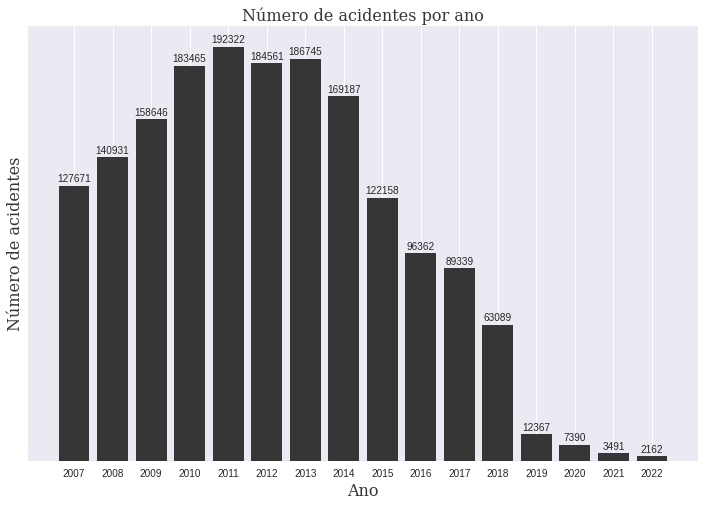

In [36]:
df_acidentes_count = df_sem_duplicatas.groupby(['ano'])['count'].sum().reset_index()

fig, ax = plt.subplots(figsize = (12, 8))

X, Y = df_acidentes_count['ano'], df_acidentes_count['count'].values

plt.title('Número de acidentes por ano', fontdict=font)
plt.bar(X, Y, color=book_colors['preto'], width=0.8)

for i in range(len(X)):
        plt.text(i, Y[i] + 2000 , Y[i], ha = 'center')

plt.xlabel('Ano', fontdict=font)
plt.ylabel('Número de acidentes', fontdict=font)
plt.yticks([])
plt.show()

## Gráfico de causas de acidente 2022

In [69]:
causas_acidentes_pb = df_sem_duplicatas.loc[((df_sem_duplicatas['uf'] == 'PB') &  \
                                            (df_sem_duplicatas['ano'] == '2019'))].groupby('causa_acidente')['count'].sum().reset_index()
causas_acidentes_pb = causas_acidentes_pb.sort_values('count', ascending=False).reset_index(drop=True)
causas_acidentes_pb

,causa_acidente,count
0,Falta de Atenção à Condução,82
1,Desobediência às normas de trânsito pelo condutor,50
2,Ingestão de Álcool,33
3,Não guardar distância de segurança,32
4,Velocidade Incompatível,29
5,Animais na Pista,11
6,Falta de Atenção do Pedestre,11
7,Pista Escorregadia,11
8,Defeito Mecânico no Veículo,10
9,Condutor Dormindo,8


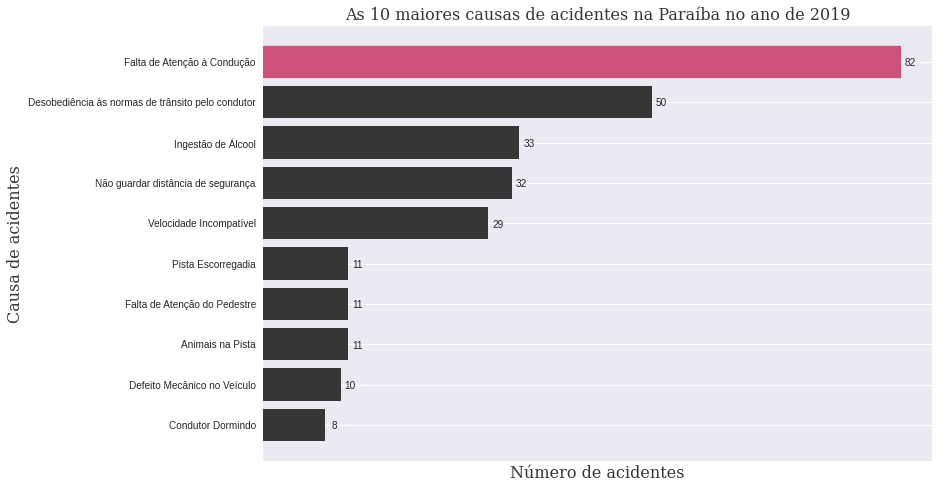

In [71]:
fig = plt.subplots(figsize = (12, 8))

df_graph = causas_acidentes_pb.iloc[:10, :].sort_values('count', ascending=True).reset_index(drop=True)
#grafico_simples(df_graph, 'causa_acidente', 'mortos', 'Gráfico de causas de acidente 2011')

plt.title('As 10 maiores causas de acidentes na Paraíba no ano de 2019', fontdict=font)
barlist = plt.barh(df_graph['causa_acidente'], df_graph['count'].values, color=book_colors['preto'])
barlist[-1].set_color(book_colors['rosa_escuro'])

plt.xlabel('Número de acidentes', fontdict=font)
plt.xticks([])
plt.ylabel('Causa de acidentes', fontdict=font)

for i in range(len(df_graph['count'].values)):
        plt.text(df_graph['count'].values[i] + 1.2, i - 0.1, df_graph['count'].values[i], ha = 'center')


plt.show()

In [39]:
acidentes_by_uf = df_sem_duplicatas.groupby('uf')['count'].sum().reset_index()
acidentes_by_uf = acidentes_by_uf.sort_values('count', ascending=False).reset_index(drop=True)
acidentes_by_uf

,uf,count
0,MG,252503
1,SC,188407
2,PR,177818
3,RJ,151456
4,RS,136828
5,SP,129840
6,BA,95733
7,GO,77929
8,ES,73334
9,PE,69496


### Os 5 estados que acontecem mais acidentes + PB

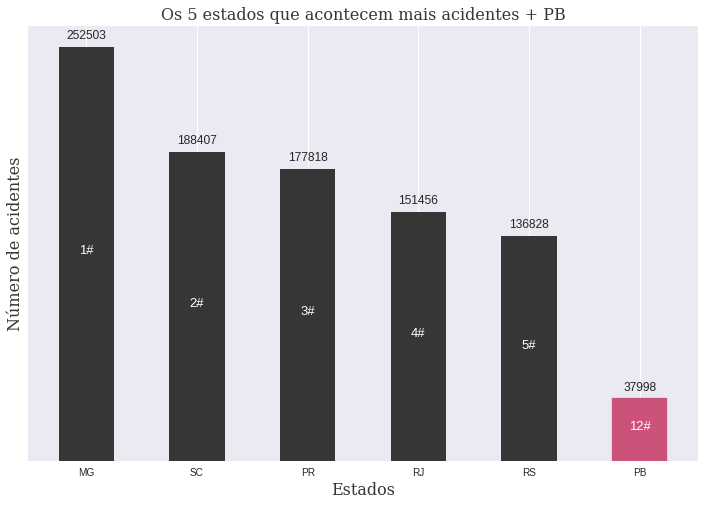

In [72]:
fig, ax = plt.subplots(figsize = (12, 8))
posicao = ['1#', '2#', '3#', '4#', '5#', '12#']

df_5_estados = acidentes_by_uf.loc[acidentes_by_uf['uf'].isin(['MG', 'SC', 'PR', 'RJ', 'RS', 'PB'])]
X, Y = df_5_estados['uf'], df_5_estados['count'].values

clrs = ['grey' if (x < max(X)) else 'red' for x in X ]

plt.title('Os 5 estados que acontecem mais acidentes + PB', fontdict=font)
barlist = plt.bar(X, Y, color=book_colors['preto'], width=0.5)
barlist[5].set_color(book_colors['rosa_escuro'])

for i in range(len(X)):
        plt.text(i, Y[i] + 5000 , Y[i], ha = 'center', fontsize=12)
for i in range(len(posicao)):
        plt.text(i, Y[i] / 2, posicao[i], ha = 'center', fontsize=13, color='white')
        
plt.xlabel('Estados', fontdict=font)
plt.ylabel('Número de acidentes', fontdict=font)
plt.yticks([])
plt.show()

## Gráficos da Paraiba

In [41]:
df_sem_duplicatas_PB = df_sem_duplicatas.loc[df_sem_duplicatas['uf'] == 'PB'].reset_index(drop=True)

In [42]:
df_sem_duplicatas_PB['municipio'] = df_sem_duplicatas_PB['municipio'].map(lambda nome: nome.strip())

In [43]:

df_pessoas = df_sem_duplicatas_PB.groupby(['ano'])['pessoas'].sum().reset_index()
df_mortos = df_sem_duplicatas_PB.groupby(['ano'])['mortos'].sum().reset_index()
df_feridos = df_sem_duplicatas_PB.groupby(['ano'])['feridos'].sum().reset_index()
df_ilesos = df_sem_duplicatas_PB.groupby(['ano'])['ilesos'].sum().reset_index()
df_ignorados = df_sem_duplicatas_PB.groupby(['ano'])['ignorados'].sum().reset_index()


anos = df_mortos['ano'].values
anos = [str(ano) for ano in anos]

In [44]:
df_total_pessoas = pd.concat([df_pessoas, 
                              df_mortos.drop(columns=['ano']), 
                               df_ignorados.drop(columns=['ano']),
                              df_feridos.drop(columns=['ano']), 
                              df_ilesos.drop(columns=['ano'])], 1)

/tmp/ipykernel_8364/3110689255.py:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  df_total_pessoas = pd.concat([df_pessoas,


In [45]:
df_total_pessoas

,ano,pessoas,mortos,ignorados,feridos,ilesos
0,2007,5853,164,173,1898,3618
1,2008,7027,185,345,2130,4366
2,2009,7592,202,372,2314,4703
3,2010,8048,194,443,2315,5096
4,2011,8202,176,449,2429,5148
5,2012,8542,223,430,2565,5324
6,2013,8973,180,539,2681,5573
7,2014,7740,182,428,2383,4746
8,2015,5874,170,393,2075,3235
9,2016,4335,156,394,1790,1995


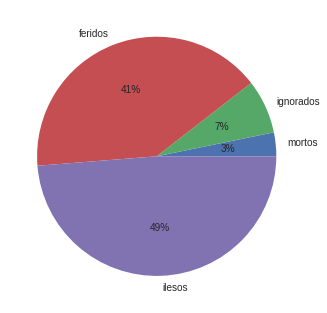

In [46]:
plt.pie(df_total_pessoas.iloc[10, 2:], labels = df_total_pessoas.columns[2:], autopct='%.0f%%')
plt.show()

In [47]:
df_total_pessoas_percent = df_total_pessoas.copy()

df_total_pessoas_percent['mortos'] = df_total_pessoas_percent['mortos'] / df_total_pessoas_percent['pessoas']
df_total_pessoas_percent['ilesos'] = df_total_pessoas_percent['ilesos'] / df_total_pessoas_percent['pessoas']
df_total_pessoas_percent['feridos'] = df_total_pessoas_percent['feridos'] / df_total_pessoas_percent['pessoas']
df_total_pessoas_percent['ignorados'] = df_total_pessoas_percent['ignorados'] / df_total_pessoas_percent['pessoas']

In [48]:
df_total_pessoas_percent.index = df_total_pessoas_percent['ano']
df_total_pessoas_percent.drop(columns=['ano', 'pessoas'], inplace=True)
df_total_pessoas_percent = df_total_pessoas_percent * 100
df_total_pessoas_percent

,mortos,ignorados,feridos,ilesos
ano,,,,
2007,2.801982,2.955749,32.427815,61.814454
2008,2.632702,4.909634,30.311655,62.131777
2009,2.660695,4.899895,30.479452,61.946786
2010,2.410537,5.504473,28.764911,63.320080
2011,2.145818,5.474275,29.614728,62.765179
2012,2.610630,5.033950,30.028096,62.327324
2013,2.006018,6.006910,29.878524,62.108548
2014,2.351421,5.529716,30.788114,61.317829
2015,2.894110,6.690501,35.325162,55.073204


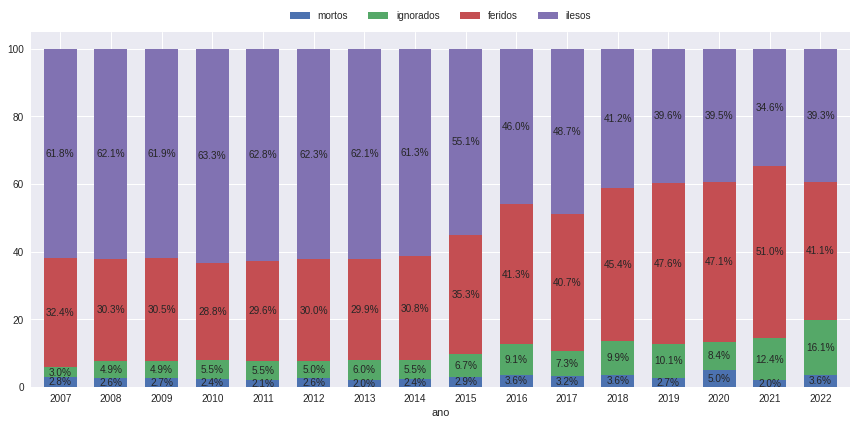

In [49]:
fig, ax = plt.subplots(figsize = (12, 8))

df_total_pessoas_percent.plot.bar(stacked=True, width=0.65, ax = ax)

plt.legend(
    bbox_to_anchor=(0.5, 1.02),
    loc="lower center",
    borderaxespad=0,
    frameon=False,
    ncol=4,
)

plt.xticks(rotation=-360)

for ix, row in df_total_pessoas_percent.reset_index(drop=True).iterrows():
    cumulative = 0
    for element in row:
        if element == element and element > 0.01:
            plt.text(
                ix,
                cumulative + element / 2,
                f"{np.round(element, 1)}%",
                va="center",
                ha="center",
            )
        cumulative += element
        
plt.tight_layout()

In [50]:
# grafico_simples(df_pessoas, 'ano', 'pessoas', 
#                 'Quantidade de pessoas que sofreram acidente na PB entre 2007 e 2020')

### Número de mortos, feridos e ilesos a cada ano na Paraíba

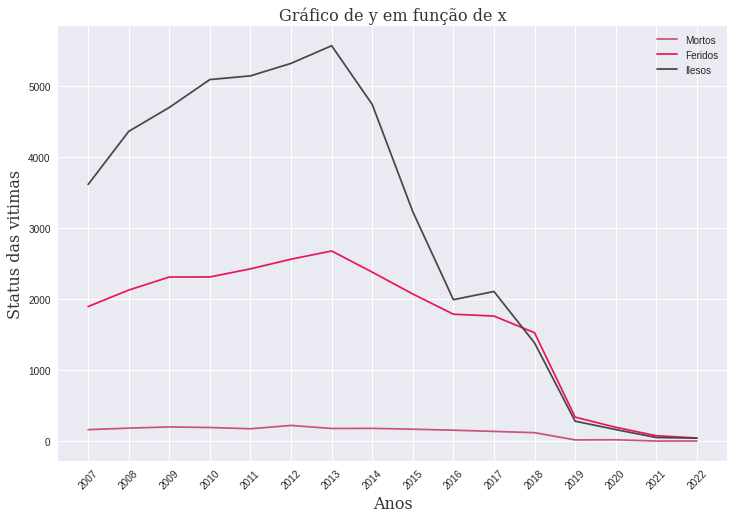

In [63]:
fig = plt.subplots(figsize = (12, 8))

plt.title('Gráfico de y em função de x', fontdict=font)
plt.plot(anos, df_mortos['mortos'].values, color=book_colors['rosa_escuro'], label="Mortos")
plt.plot(anos, df_feridos['feridos'].values, color=book_colors['rosa'], label="Feridos")
plt.plot(anos, df_ilesos['ilesos'].values, color=book_colors['preto_claro'], label="Ilesos")
plt.legend(loc="upper right")
plt.xlabel('Anos', fontdict=font)
plt.ylabel('Status das vitimas', fontdict=font)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [52]:
df_sem_duplicatas_PB

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,...,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop,count
0,174007.0,01/01/2007,Segunda,18:30:00,PB,230,153.4,CAMPINA GRANDE,Outras,Colisão Transversal,...,2,0,2,2,NaN,NaN,NaN,NaN,NaN,1
1,174064.0,02/01/2007,Terça,02:20:00,PB,101,85.9,BAYEUX,Animais na Pista,Atropelamento de animal,...,2,0,2,2,NaN,NaN,NaN,NaN,NaN,1
2,174133.0,02/01/2007,Terça,07:35:00,PB,230,138.2,CAMPINA GRANDE,Outras,Saída de Pista,...,1,0,0,1,NaN,NaN,NaN,NaN,NaN,1
3,174141.0,01/01/2007,Segunda,16:30:00,PB,101,112.9,ALHANDRA,Ultrapassagem indevida,Colisão frontal,...,0,0,1,2,NaN,NaN,NaN,NaN,NaN,1
4,174304.0,02/01/2007,Terça,11:30:00,PB,230,136.6,CAMPINA GRANDE,Outras,Capotamento,...,0,0,2,1,NaN,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37993,923833.0,18/12/2010,Sábado,23:40:00,PB,230,506.4,CAJAZEIRAS,Ingestão de álcool,Colisão traseira,...,1,0,1,2,NaN,NaN,NaN,NaN,NaN,1
37994,931456.0,16/10/2010,Sábado,10:12:00,PB,230,28.7,JOAO PESSOA,Falta de atenção,Colisão lateral,...,2,0,0,2,NaN,NaN,NaN,NaN,NaN,1
37995,962911.0,20/08/2010,Sexta,14:10:00,PB,230,25.4,JOAO PESSOA,Outras,Colisão lateral,...,1,0,2,2,NaN,NaN,NaN,NaN,NaN,1
37996,968279.0,20/10/2010,Quarta,12:00:00,PB,230,15.4,JOAO PESSOA,Falta de atenção,Colisão lateral,...,2,0,0,2,NaN,NaN,NaN,NaN,NaN,1


In [53]:
def split_time(time):
    
    time_int = int(''.join(time.split(':')[:2]))
    
    if 0 < time_int < 600:
        return '00-06'
    elif 600 < time_int < 800:
        return '06-08'
    elif 800 < time_int < 1200:
        return '08-12'
    elif 1200 < time_int < 1600:
        return '12-16'
    elif 1600 < time_int < 2000:
        return '16-20'
    elif 2000 < time_int < 2400:
        return '20-24'


In [54]:
df_sem_duplicatas_PB['time_split'] = df_sem_duplicatas_PB['horario'].apply(lambda time: split_time(time), 1)

In [55]:
df_sem_duplicatas_PB['time_split'].value_counts()

16-20    10396
12-16     6917
08-12     6896
20-24     4234
00-06     4019
06-08     3876
Name: time_split, dtype: int64

In [56]:
import geopandas as gpd

ModuleNotFoundError: No module named 'geopandas'

In [ ]:
INFOS_UFS = gpd.read_file('bcim_2016_21_11_2018.gpkg', layer='lim_unidade_federacao_a')

In [ ]:
INFOS_UFS.columns

Index(['nome', 'nomeabrev', 'geometriaaproximada', 'sigla', 'geocodigo',
       'id_produtor', 'id_elementoprodutor', 'cd_insumo_orgao',
       'nr_insumo_mes', 'nr_insumo_ano', 'tx_insumo_documento', 'geometry'],
      dtype='object')

In [ ]:
df_sem_duplicatas = df_sem_duplicatas.rename(columns={"uf": "sigla"})

In [ ]:
df_sem_duplicatas_ufs = df_sem_duplicatas.groupby(['sigla'])['pessoas'].mean().reset_index()
df_sem_duplicatas_ufs = df_sem_duplicatas_ufs.iloc[1:, :].reset_index(drop=True)

In [ ]:
df_sem_duplicatas_ufs

,sigla,pessoas
0,AC,2.460556
1,AL,2.271468
2,AM,2.998225
3,AP,2.786613
4,BA,2.341057
5,CE,2.267941
6,DF,2.425681
7,ES,2.176732
8,GO,2.251569
9,MA,2.305141


In [ ]:
df_sem_duplicatas_merged = INFOS_UFS.merge(df_sem_duplicatas_ufs, 
                                           on='sigla', 
                                           how='left')

In [ ]:
df_sem_duplicatas_merged

,nome,nomeabrev,geometriaaproximada,sigla,geocodigo,id_produtor,id_elementoprodutor,cd_insumo_orgao,nr_insumo_mes,nr_insumo_ano,tx_insumo_documento,geometry,pessoas
0,Goiás,NaN,Sim,GO,52,1000001,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((-50.15876 -12.41581, -50.15743...",2.251569
1,Mato Grosso do Sul,NaN,Sim,MS,50,1000001,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((-56.09815 -17.17220, -56.09159...",2.320704
2,Paraná,NaN,Sim,PR,41,1000001,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((-52.08090 -22.52893, -52.04903...",2.167243
3,Minas Gerais,NaN,Sim,MG,31,1000001,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((-44.21152 -14.22955, -44.20750...",2.069114
4,Sergipe,NaN,Sim,SE,28,1000001,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((-38.00366 -9.51544, -38.00052 ...",2.250388
5,Alagoas,NaN,Sim,AL,27,1000001,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((-35.45878 -8.81780, -35.45898 ...",2.271468
6,Tocantins,NaN,Sim,TO,17,1000001,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((-48.34644 -5.17871, -48.34311 ...",2.359911
7,Roraima,NaN,Sim,RR,14,1000001,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((-60.17793 5.23024, -60.16619 5...",2.668313
8,Amazonas,NaN,Sim,AM,13,1000001,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((-67.32285 2.04176, -67.29220 1...",2.998225
9,Acre,NaN,Sim,AC,12,1000001,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((-73.73811 -7.13471, -72.90246 ...",2.460556


<AxesSubplot:>

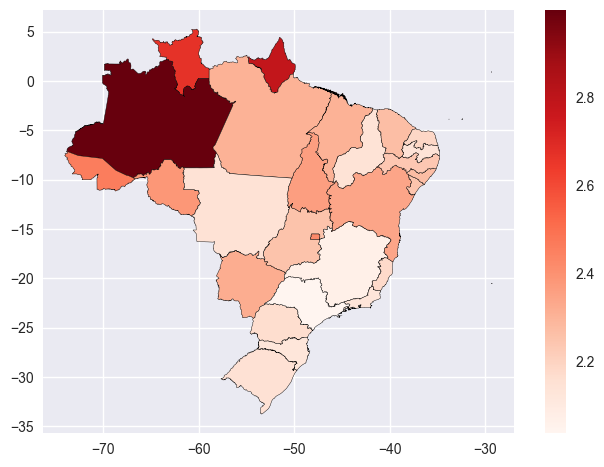

In [ ]:
df_sem_duplicatas_merged.plot(column='pessoas',
                             cmap='Reds',
                             legend=True,
                             edgecolor='black')